<a href="https://colab.research.google.com/github/cleo-bs/MVP_Analise_de_Dados/blob/main/MVP_An%C3%A1lise_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP | Cléo Berni | Sprint: Análise de Dados

# Problem Discussion

The aim of this study is to understand the behavior of customers from a restaurant delivery app. By understanding their characteristics, the company can create targeted marketing for each customer in a more personalized way.

* What is the demographic profile of the customers (income, household composition, education, and marital status)?
* What are the purchasing habits of the customers (e.g., spending on wines, fruits, meat, fish, and other products)?
* How do customer interactions vary across different channels?
* What is the impact of past marketing campaigns on customer purchases (campaign acceptance vs. spending)

# Import Libraries & Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
url = 'https://raw.githubusercontent.com/cleo-bs/MVP_Analise_de_Dados/main/ifood_df.csv'
df = pd.read_csv(url)

In [3]:
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


# Dataset Information

### **Columns Descriptions**

* AcceptedCmp1 — 1 if costumer accepted the offer in the 1º campaign, O otherwise
* AcceptedCmp2 - 1 if costumer accepted the offer in the 2º campaign, 0 otherwise
* AcceptedCmp3 - 1 if costumer accepted the offer in the 3º campaign, 0 otherwise
* AcceptedCmp4 - 1 if costumer accepted the offer in the 4º campaign, 0 otherwise
* AcceptedCmp5 - 1 if costumer accepted the offer in the 5º campaign, 0 otherwise
* Response (target) - 1 if costumer accepted the offer in the last campaign, 0 otherwise
* Complain - 1 if costumer complained in the last 2 years
* Customer Days - date of customer's enrollment with the company
* Education - customer's level of education
* Marital - customer's marital status
* Kidhome - number of small children in customer's household
* Teenhome - number of teenagers in customer's household
* Income - customer's yearly household income
* MntFishProducts - amount spent on fish products in the last 2 years
* MntMeatProducts - amount spent on meat products in the last 2 years
* MntFruits - amount spent on fruits in the last 2 years
* MntSweetProducts — amount spent on sweet products in the last 2 years
* MntWines - amount spent on wines in the last 2 years
* MntGoldProds - amount spent on gold products in the last 2 years
* NumDealsPurchases - number of purchases made with discount
* NumCatalogPurchases - munber of purchases made using catalogue
* NumStorePurchases — number of purchases made directly in stores
* NumWebPurchases — number of purchases made through company's web site
* NumWebVisitsMonth — number of visits to company's web site in the last month
* MntTotal - sum of amount spent on food exclusively
* Recency - number of days since the last purchase

### **Basic Information**

Below is an overview of the dataset's basic structure. It contains 39 columns and 2205 rows, primarily consisting of numerical and binary data. There is no issue with the data type in any columns.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

* Analyzing the number of unique categories in each column to better understand their behavior and identify any redundant or irrelevant information.
  * Two columns stood out: Z_CostContact and Z_Revenue, as they contain only a single unique value across the entire dataset.

In [5]:
df.nunique()

,0
Income,1963
Kidhome,3
Teenhome,3
Recency,100
MntWines,775
MntFruits,158
MntMeatProducts,551
MntFishProducts,182
MntSweetProducts,176
MntGoldProds,212


In [6]:
#Since the data is repeated for all rows, this columns will be deleted from the dataframe.
df[['Z_CostContact','Z_Revenue']]

,Z_CostContact,Z_Revenue
0,3,11
1,3,11
2,3,11
3,3,11
4,3,11
...,...,...
2200,3,11
2201,3,11
2202,3,11
2203,3,11


In [7]:
df = df.drop(columns=['Z_CostContact','Z_Revenue'])

Separating the dataframe into binary and non-binary columns to facilitate a more detailed statistical analysis.

In [8]:
binary_list = ['marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow','education_2n Cycle','education_Basic', 'education_Graduation', 'education_Master', 'education_PhD', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']
non_binary_list = df.columns.difference(binary_list)
print("The list of binary columns has {} columns and the other {} columns".format(len(non_binary_list), len(binary_list)))

The list of binary columns has 20 columns and the other 17 columns


# Data Preparation

In this section, null values will be examined, outliers identified, and duplicate rows checked.

### **Null Values**

In [9]:
df.isnull().sum()
#There is no null values in the dataset

,0
Income,0
Kidhome,0
Teenhome,0
Recency,0
MntWines,0
MntFruits,0
MntMeatProducts,0
MntFishProducts,0
MntSweetProducts,0
MntGoldProds,0


### **Duplicated Values**

In [10]:
duplicated = df[df.duplicated()]
duplicated

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
77,38620.0,0,0,56,112,17,44,34,22,89,...,1,0,0,0,0,1,0,229,140,0
167,78497.0,0,0,44,207,26,447,75,0,223,...,0,0,1,0,0,0,0,755,532,1
267,51369.0,0,1,84,297,7,79,0,11,182,...,1,0,0,0,1,0,0,394,212,0
268,37760.0,0,0,20,84,5,38,150,12,28,...,1,0,0,0,1,0,0,289,261,0
346,37717.0,1,0,31,9,0,6,4,1,5,...,0,0,0,0,0,0,1,20,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,22775.0,1,0,40,5,1,8,0,0,1,...,1,0,0,0,1,0,0,14,13,0
2188,75777.0,0,0,12,712,26,538,69,13,80,...,0,0,0,0,0,1,0,1358,1278,2
2192,58554.0,1,1,55,368,24,68,38,0,88,...,1,0,0,0,1,0,0,498,410,0
2199,34421.0,1,0,81,3,3,7,6,2,9,...,0,0,0,0,1,0,0,21,12,0


In [11]:
df[df['Income']==	75777.0]

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
55,75777.0,0,0,12,712,26,538,69,13,80,...,0,0,0,0,0,1,0,1358,1278,2
2188,75777.0,0,0,12,712,26,538,69,13,80,...,0,0,0,0,0,1,0,1358,1278,2


* It is evident that some rows are duplicated, as the customer's income, monthly consumption, and recency share identical values. Since they represent only 3.81% of the dataset, they will be removed.

In [12]:
num_duplicated = duplicated.shape[0]
print("There are {} duplicated rows in the dataset.".format(num_duplicated))

There are 184 duplicated rows in the dataset.


In [13]:
df= df.drop_duplicates()
df.shape

(2021, 37)

### **Outliers**

In [14]:
df['Income'].describe().round(1).map('{:,.1f}'.format)

,Income
count,"2,021.0"
mean,"51,687.3"
std,"20,713.0"
min,"1,730.0"
25%,"35,416.0"
50%,"51,412.0"
75%,"68,274.0"
max,"113,734.0"


* The minimum wage values appear unusual, as they are calculated on an annual basis. There are 59 rows (approximately 2.91%) with salaries below the minimum wage in Brazil, set at R$ 15,600 per year. Based on business understanding, we will treat these rows as outliers and remove them from the dataset.

In [15]:
df_check_income = df[df['Income'] < 15600]
df_check_income[['Income']].count()

,0
Income,59


In [16]:
df.drop(df[df['Income'] < 15600].index, inplace=True)
df.shape

(1962, 37)

# Feature Understanding

### **Numerical Columns**

The boxplot graphs below provide a clearer understanding of the data distribution and indicate whether outliers are present. It is evident that the **columns related to consumption**, such as 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', and 'MntSweetProducts', **contain outliers**. On the other hand, **the most important columns for creating a customer profile**, like Income, Age, and Recency, **do not display outliers**. Therefore, **we will consider the variations in their consumption patterns as normal and characteristic of each customer**.

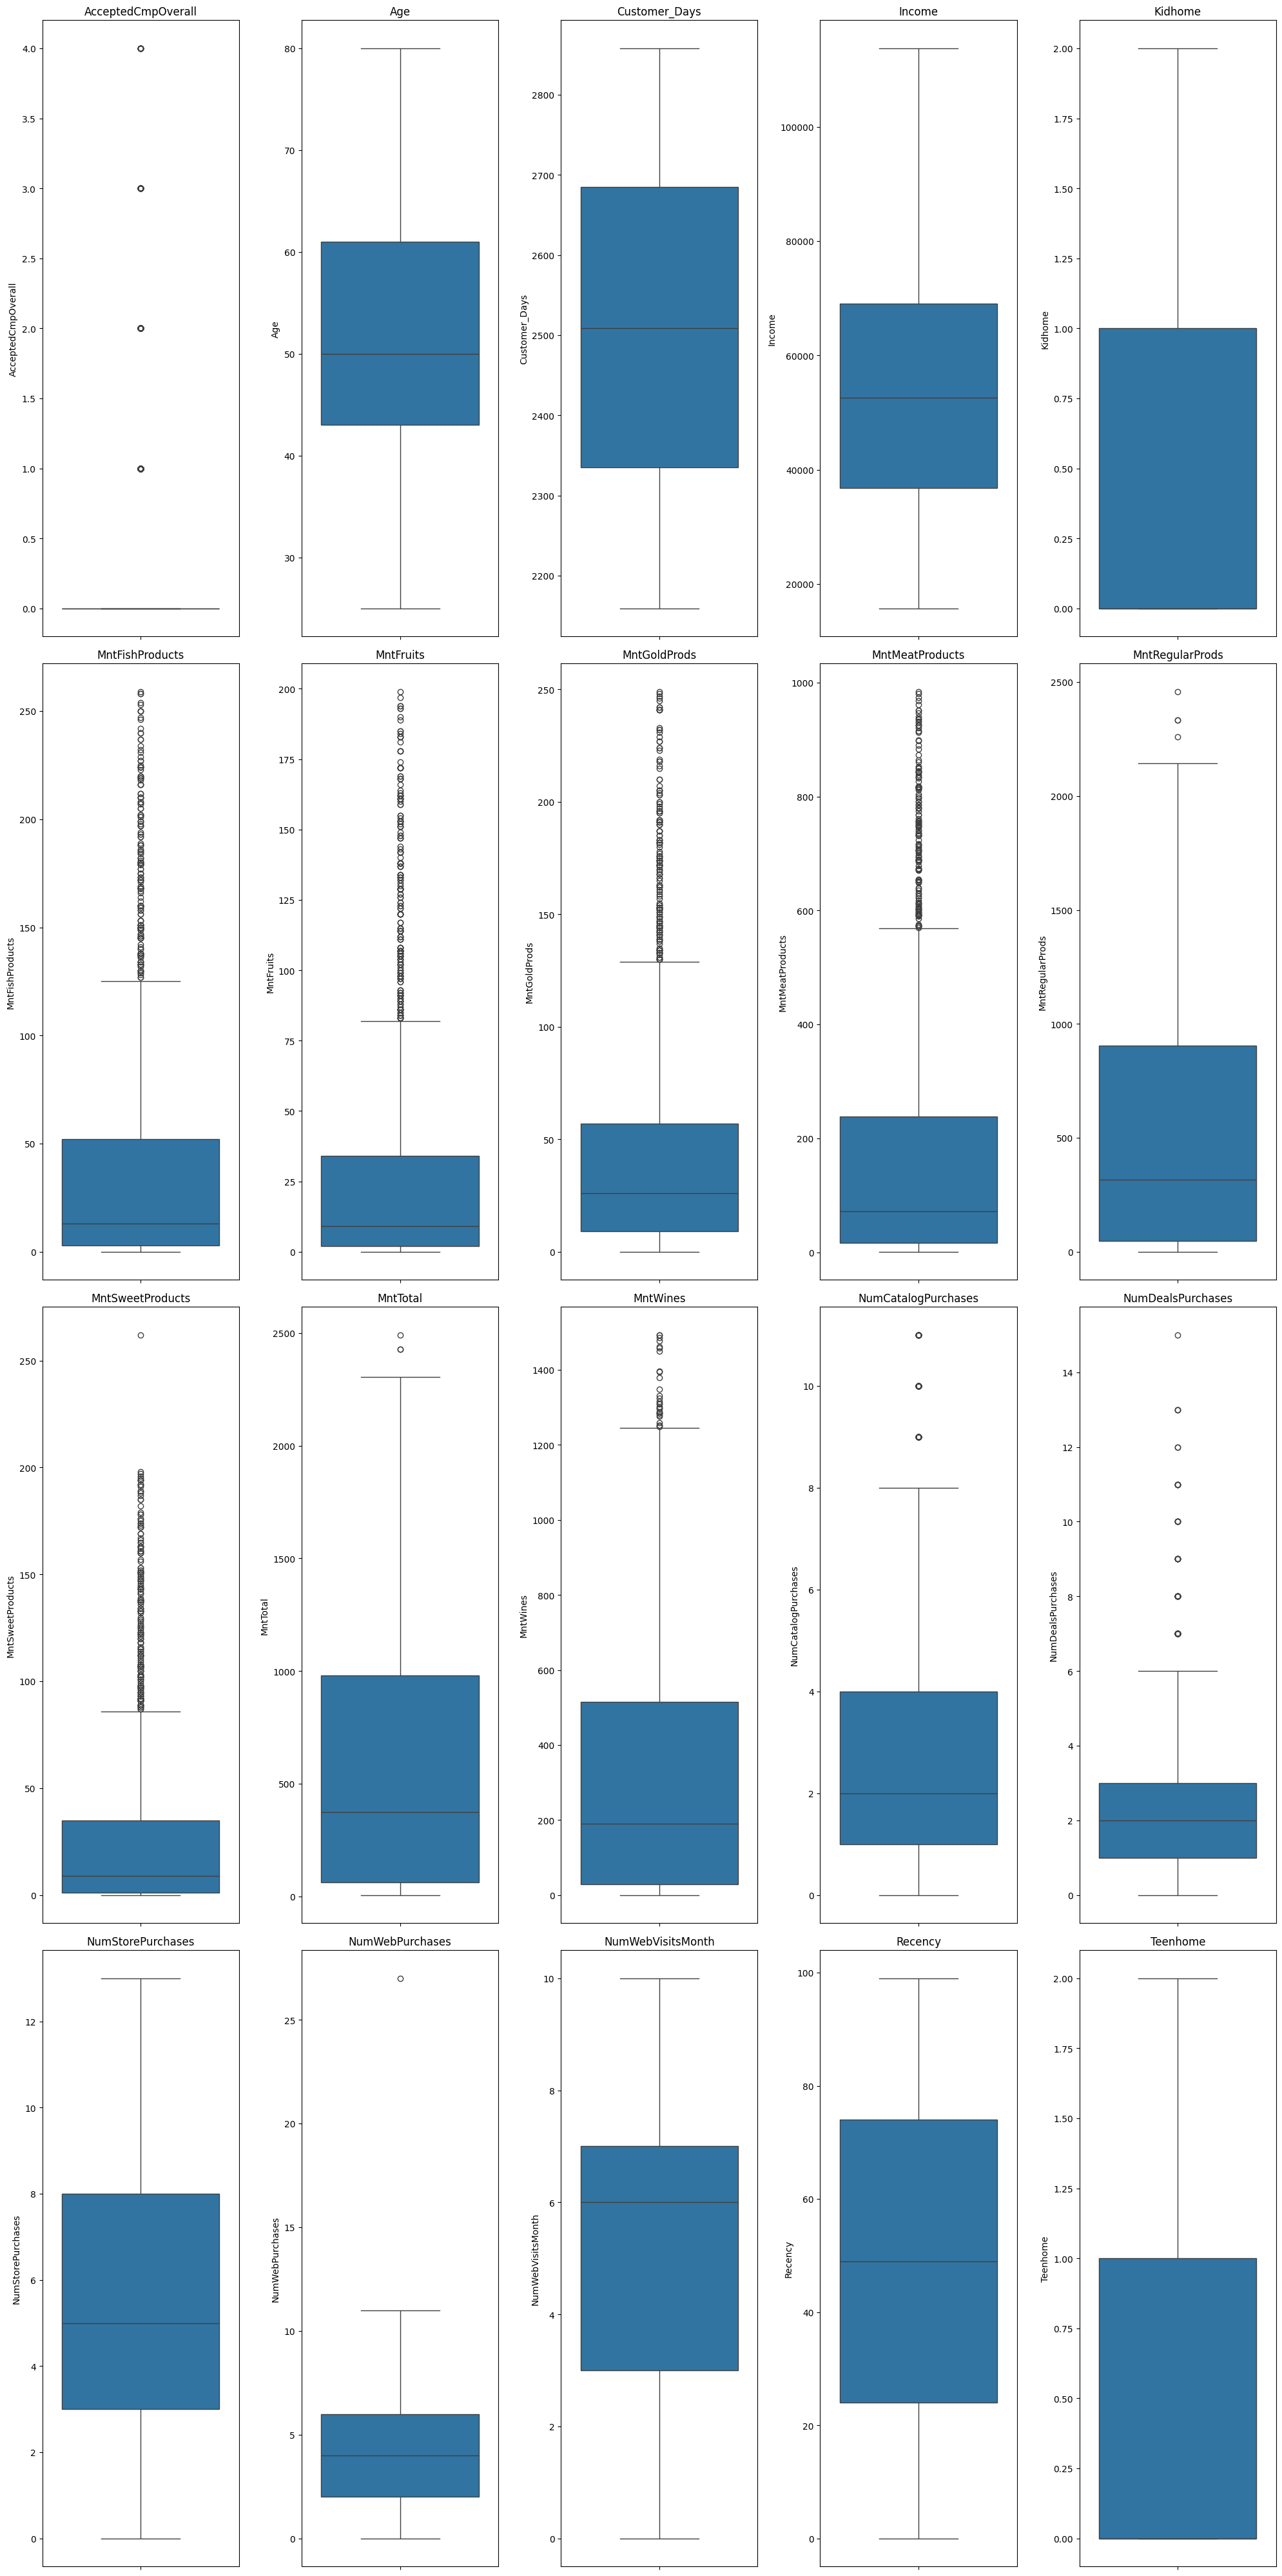

In [17]:
plt.figure(figsize=(20, 50))
colunas = df[non_binary_list].columns

for i, col in enumerate(colunas, 1):
    plt.subplot(5, 5, i)
    sns.boxplot(data=df, y=col)
    plt.title(col)

plt.tight_layout()
plt.show()

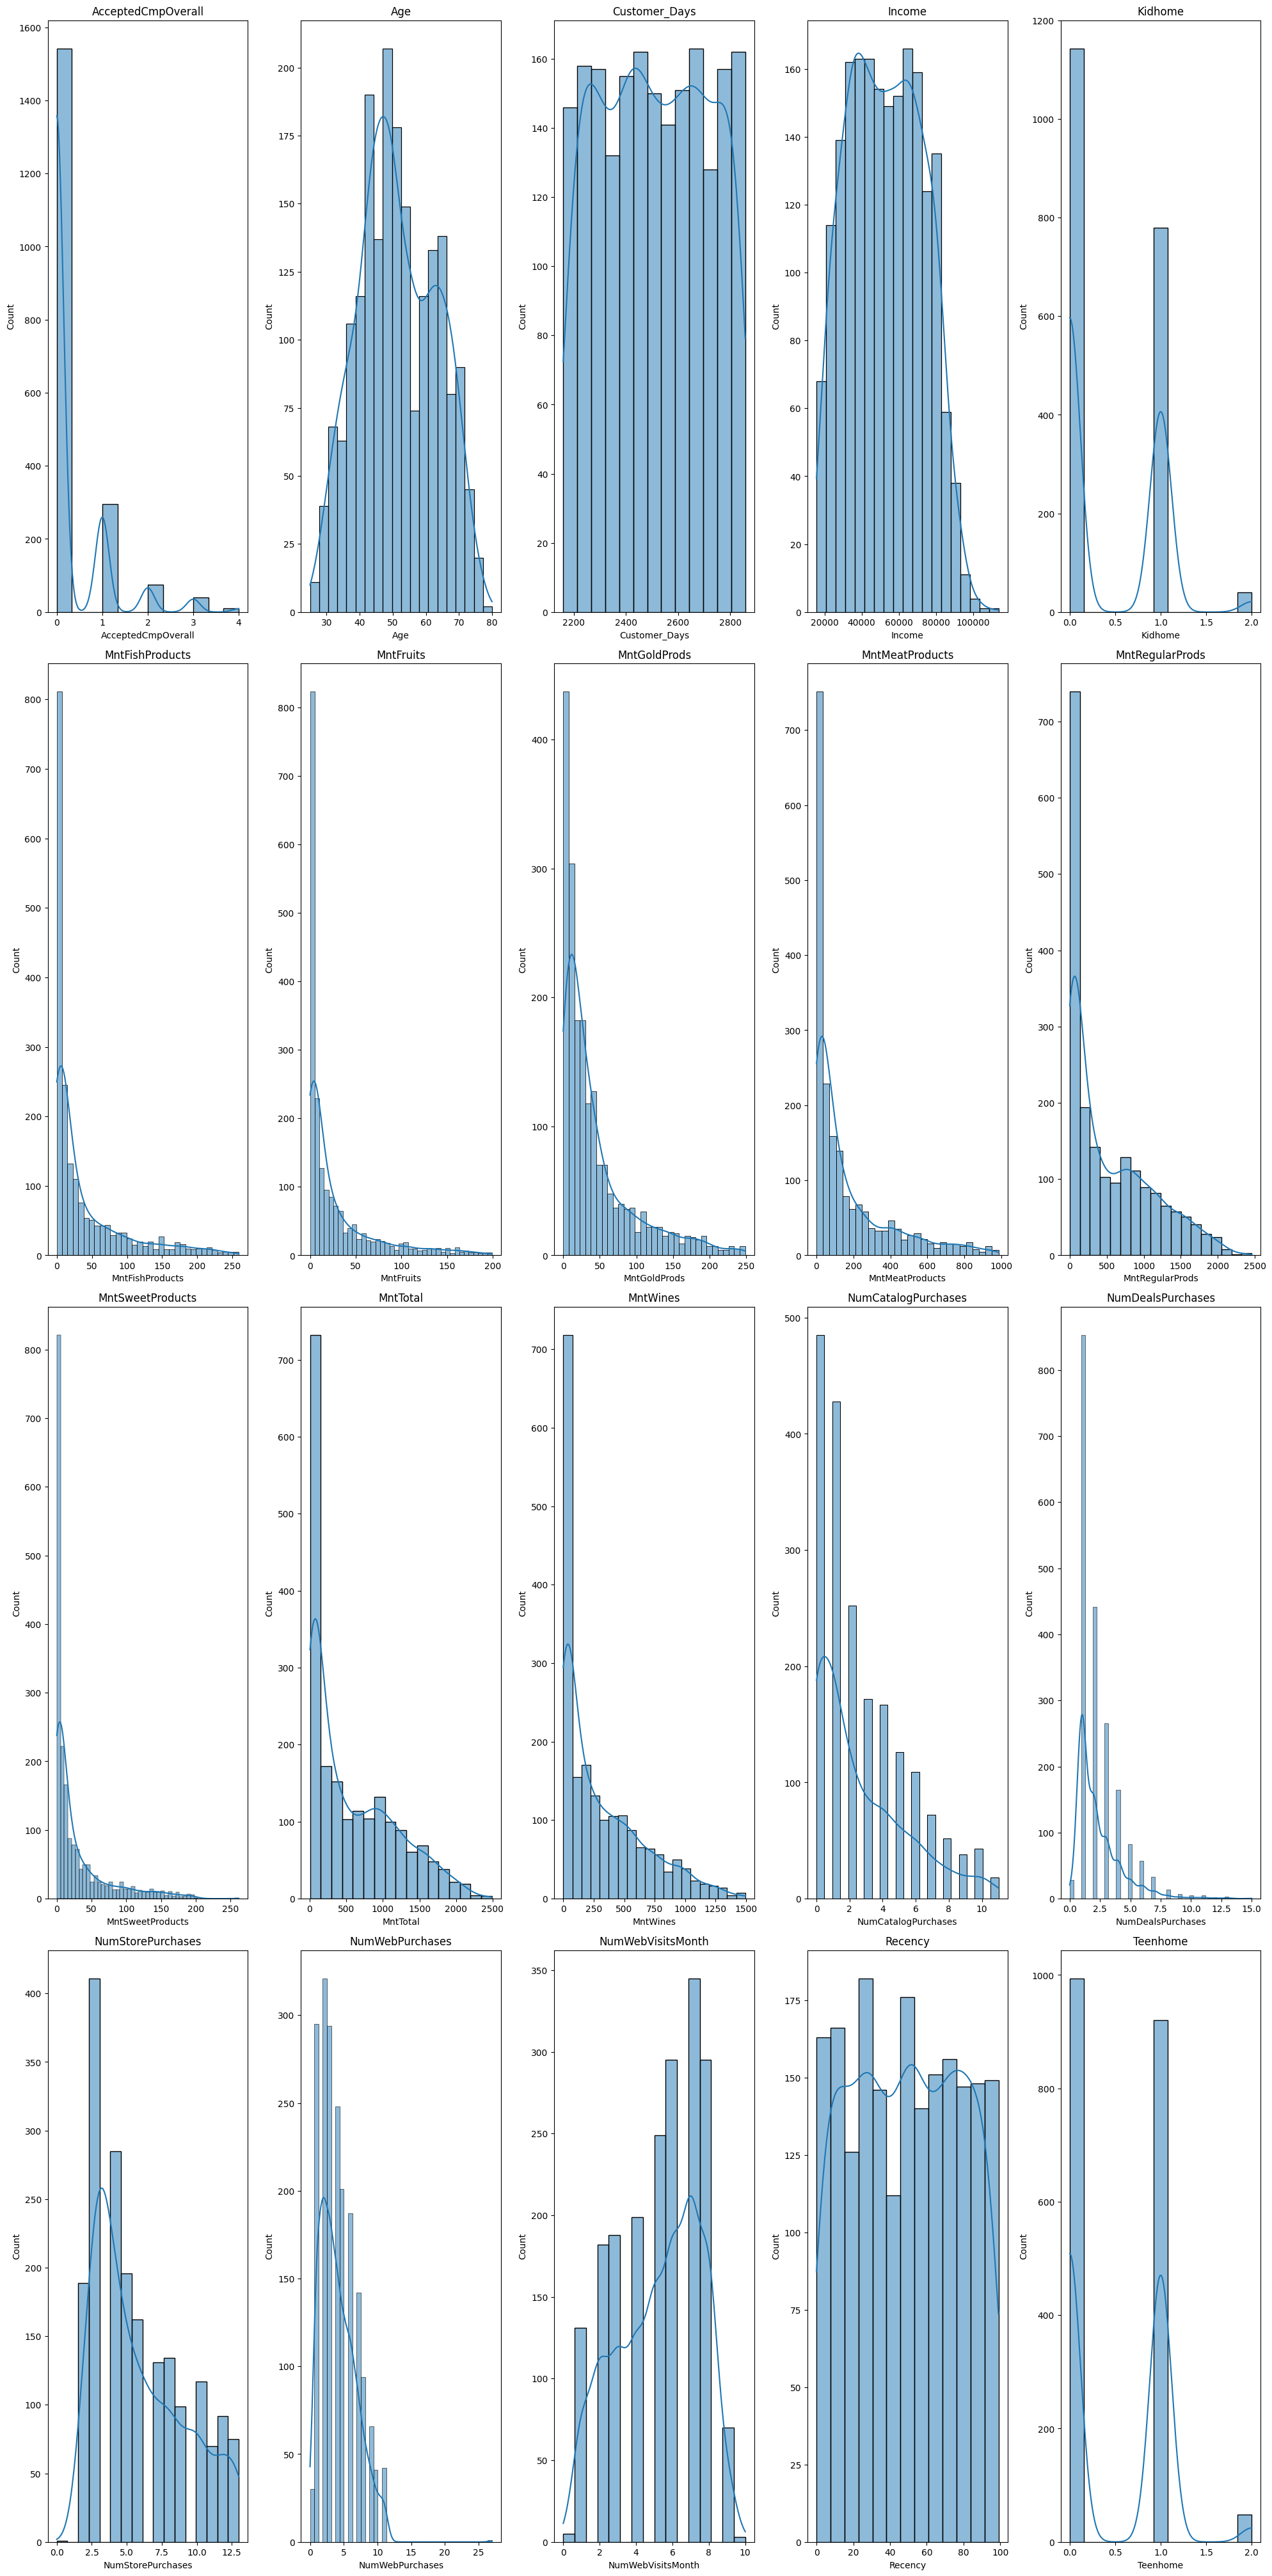

In [18]:
plt.figure(figsize=(20, 50))
colunas = df[non_binary_list].columns

for i, col in enumerate(colunas, 1):
    plt.subplot(5, 5, i)
    sns.histplot(data=df, x=col, kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

In [19]:
df[non_binary_list].describe().round(1).map('{:,.1f}'.format)

,AcceptedCmpOverall,Age,Customer_Days,Income,Kidhome,MntFishProducts,MntFruits,MntGoldProds,MntMeatProducts,MntRegularProds,MntSweetProducts,MntTotal,MntWines,NumCatalogPurchases,NumDealsPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Recency,Teenhome
count,"1,962.0","1,962.0","1,962.0","1,962.0","1,962.0","1,962.0","1,962.0","1,962.0","1,962.0","1,962.0","1,962.0","1,962.0","1,962.0","1,962.0","1,962.0","1,962.0","1,962.0","1,962.0","1,962.0","1,962.0"
mean,0.3,51.3,"2,509.9","52,930.9",0.4,38.5,27.0,44.4,169.8,534.3,27.9,578.7,315.4,2.7,2.3,5.9,4.2,5.3,48.8,0.5
std,0.7,11.6,202.1,"19,709.6",0.5,55.4,40.2,51.3,218.7,555.3,42.0,577.6,338.7,2.8,1.8,3.2,2.7,2.3,28.9,0.5
min,0.0,25.0,"2,159.0","15,716.0",0.0,0.0,0.0,0.0,1.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,43.0,"2,335.2","36,733.0",0.0,3.0,2.0,9.0,17.0,47.0,1.0,62.0,28.0,1.0,1.0,3.0,2.0,3.0,24.0,0.0
50%,0.0,50.0,"2,508.5","52,583.0",0.0,13.0,9.0,26.0,72.0,315.5,9.0,373.5,190.0,2.0,2.0,5.0,4.0,6.0,49.0,0.0
75%,0.0,61.0,"2,685.0","69,051.2",1.0,52.0,34.0,57.0,238.0,903.2,35.0,980.8,515.8,4.0,3.0,8.0,6.0,7.0,74.0,1.0
max,4.0,80.0,"2,858.0","113,734.0",2.0,259.0,199.0,249.0,984.0,"2,458.0",262.0,"2,491.0","1,493.0",11.0,15.0,13.0,27.0,10.0,99.0,2.0


With the distribution charts and boxplot above, it is possible to understand several points:

* '*AcceptedCmpOverall*': **Most of our customers did not accept the campaign, but those who did, accepted it on the first contact**.
* '*Age*': Half of our customers are under 50 years old. **It follows a bimodal distribution with peaks in the 40-50 and 60-70 age ranges**.
* '*Customer Days*': We have a curve with two slight peaks at 2200-2300 and 2400-2500 days. However, 50% of the values are below 2500 days, indicating that **the customer base is well-established, as they have been using the app for almost 7 years on average**.
* '*Income*': On average, our customer earns 53k annually, with peaks in the 30-40k and 60-70k income ranges. **This suggests a middle-class customer where most have no children or at least one child**.
* '*Catalogue*': They are catalog session users, as 50% of the base accesses this portal up to 2 times.
* '*Deals Purchase*': **Most of the customer base has used a discount at least once**, with an average use of 2.3 coupons.**This shows that our customers respond to coupon usage.**
* '*NumStorePurchases*' and '*NumWebPurchases*': **Our customers tend to shop more in-store than on the company’s website**. There is a peak in-store visits between 2.5-5 and an average of 6 visits. For website visits, there is an average of 4.2 visits with a peak between 2-3.
* '*NumWebVisitsMonth*': **50% of the base visits the website up to 6 times per month.**
* '*Recency*': It has a distribution with peaks between 20-30 days and 40-50 days and an average of 49 days. **This indicates that our customers shop every 1 to 1.5 months.**

### **Binary Columns**

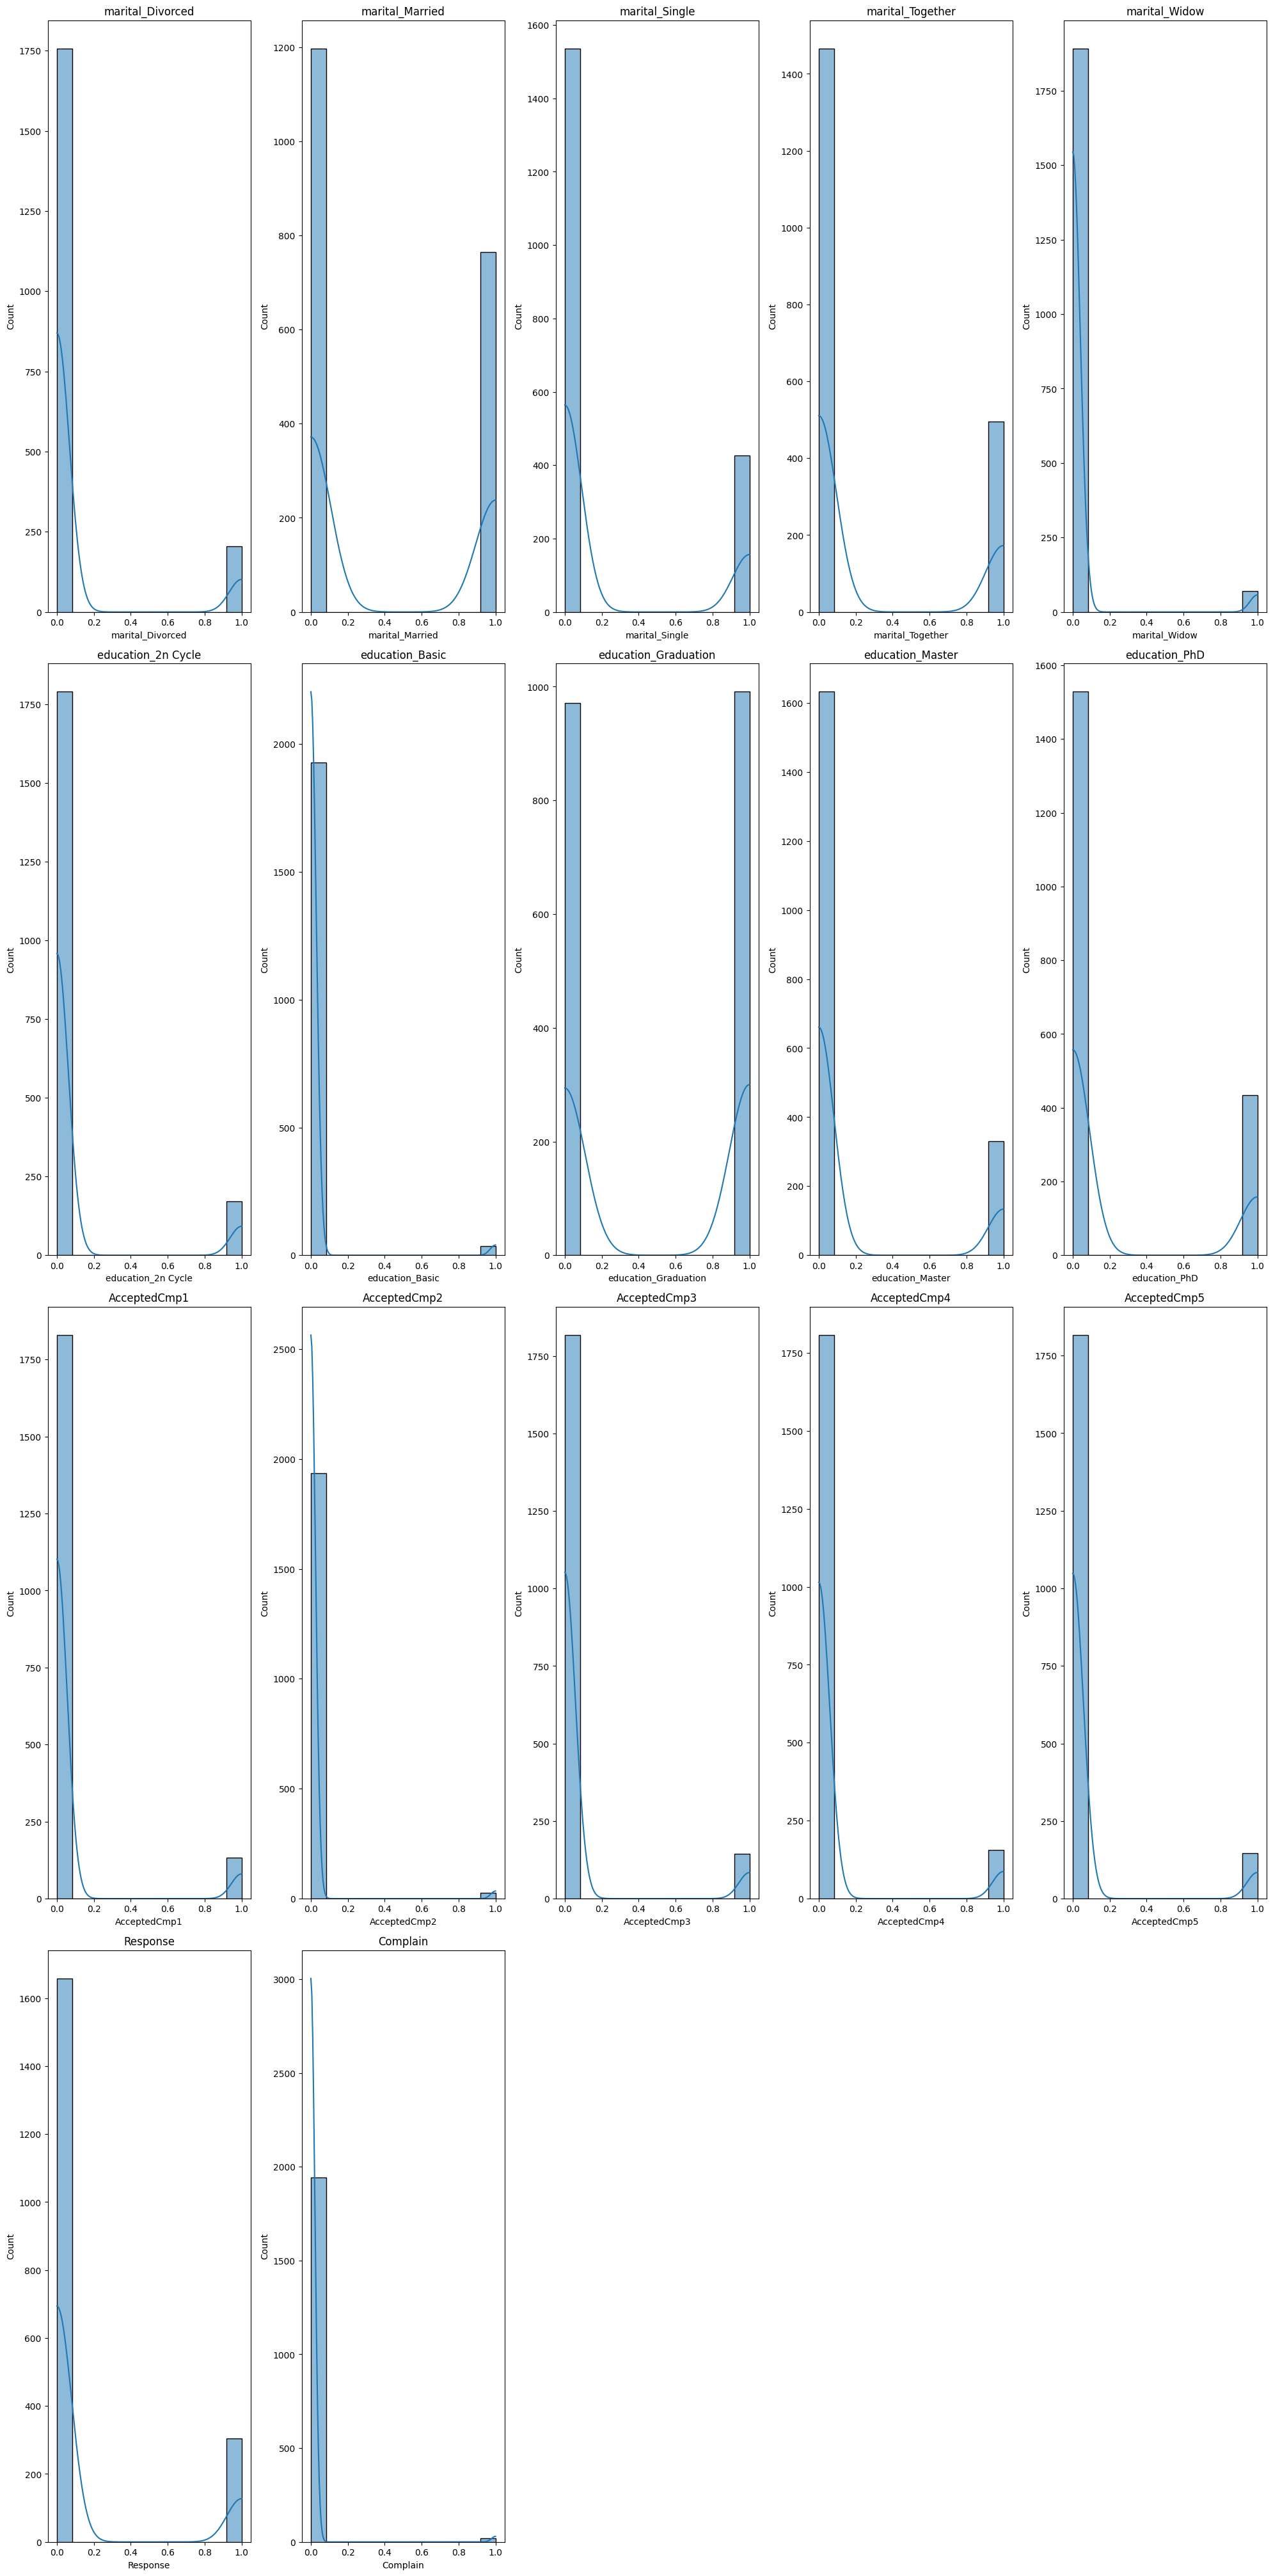

In [20]:
plt.figure(figsize=(20, 50))
colunas = df[binary_list].columns

for i, col in enumerate(colunas, 1):
    plt.subplot(5, 5, i)
    sns.histplot(data=df, x=col, kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

According to the charts above, we can understand a few other points:
 * We have more married or partnered customers than single/divorced ones.
 * Most of our customer base has at least a bachelor's degree, with a strong presence of those with a master's or PhD.
 * **There is a steadily increasing response with each new campaign**.
 * The complaining rate is low.

# Feature Relationship

### **Heatmap**

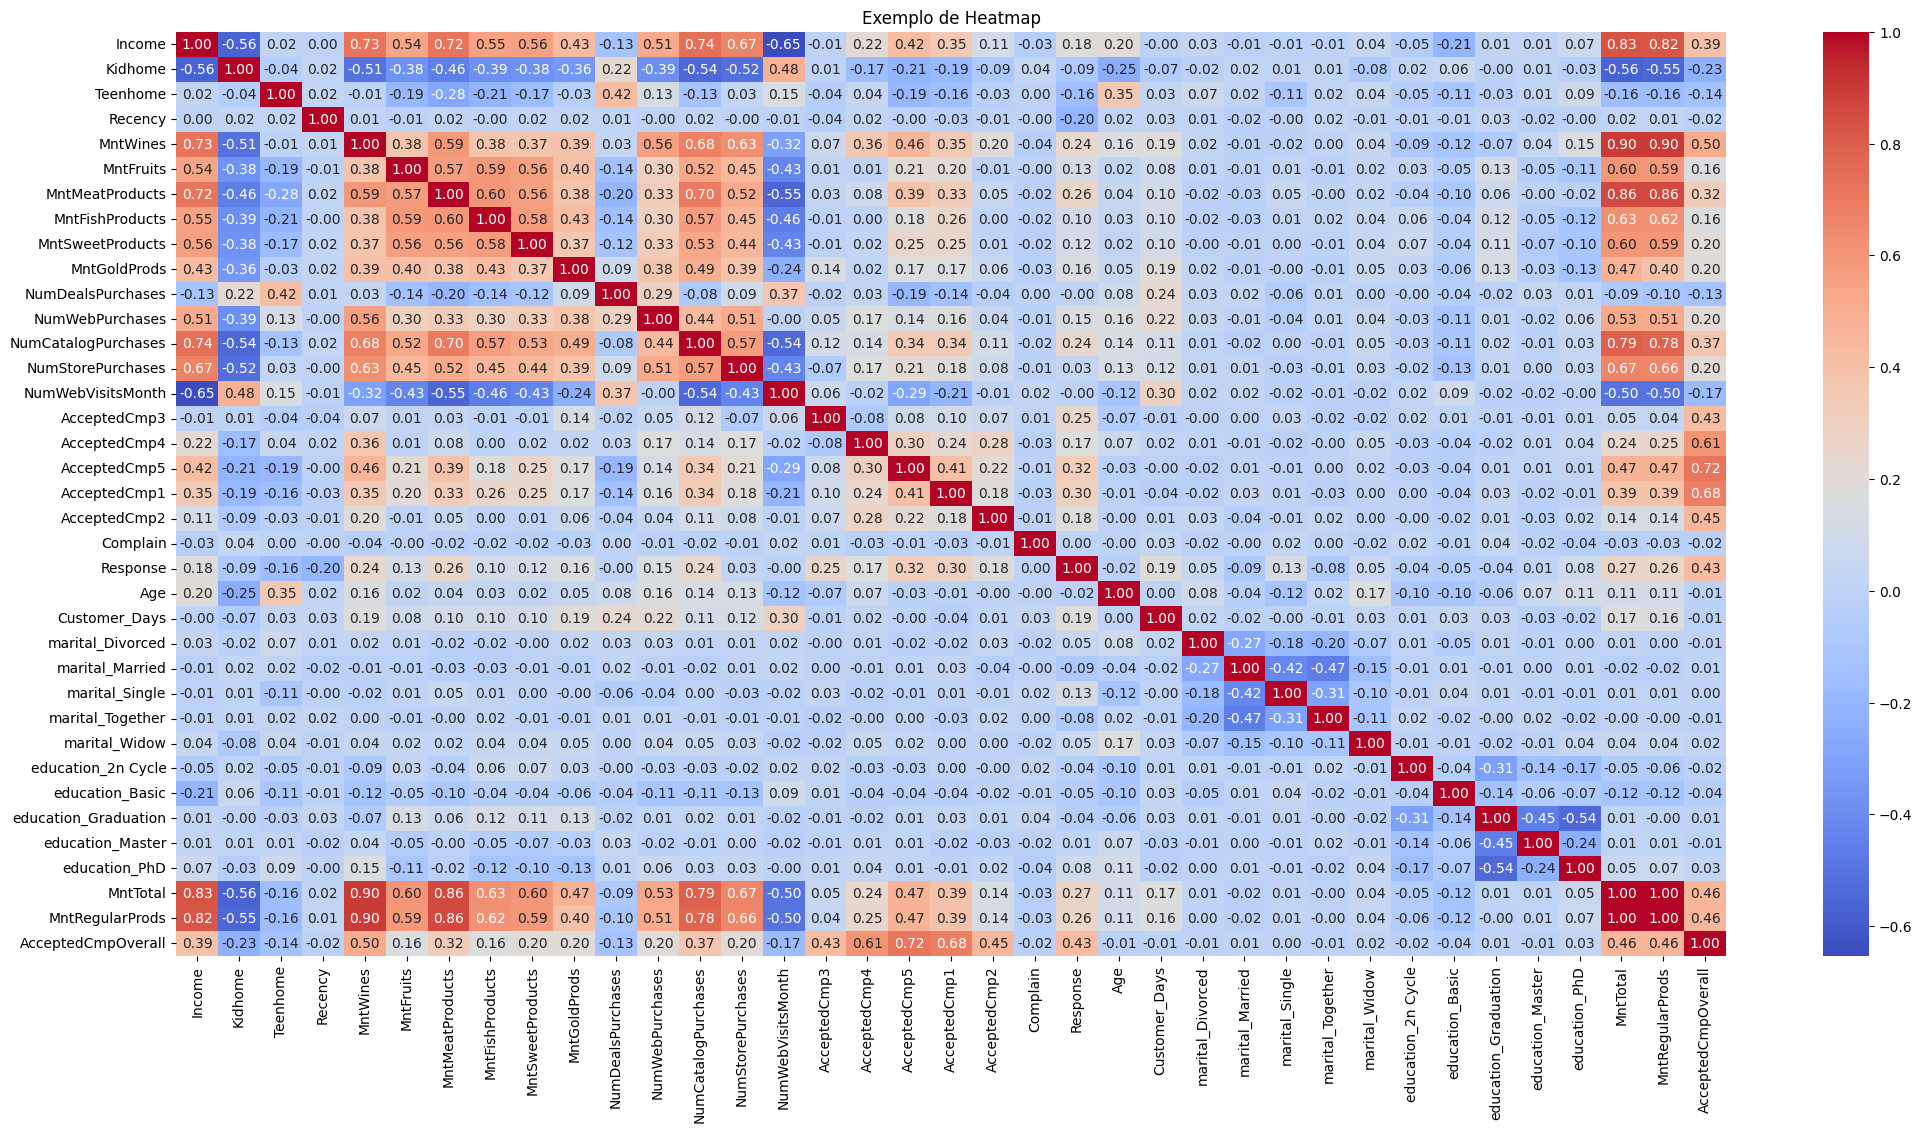

In [21]:
plt.figure(figsize=(25, 12))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Exemplo de Heatmap')
plt.show()


With the heatmap above, we can notice some key correlations:
* **Income has a high correlation with customer spending** on food, **especially on products like Wine and Meat**.
* This column also shows a **good correlation with purchases made via catalog and in-store purchases**, but a **negative correlation with purchases made through the restaurant's website**.
* **Wine consumption correlates with purchases made through catalogs and in store**.
* **Meat consumption** also has a **direct relationship with catalog purchases and fish consumption**.
* The **total customer spending** has a **strong correlation** with the **number of purchases made via catalogs and in store.**

### **Bivariate Analysis**

#### **Income analysis**

* With a positive correlation to total spending, it can be observed that the higher the income, the greater the spending. However, **spending intensifies particularly in the 80k reais range**. This is tied to the **increased consumption of wine and meat** in this range as well.
* It can also be noted that **catalog purchases**, especially **above 7 purchases, occur in the 60-80k reais range**. This **same behavior is observed for in-store purchases**. However, regarding **website access**, since **there is a negative correlation**, **purchases above 6 times are in the 20-50k reais range**.

In [22]:
def grafico_bivariado(col1, col2):
    plt.scatter(df[col1], df[col2])
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(f'{col1} vs {col2}')
    plt.show()


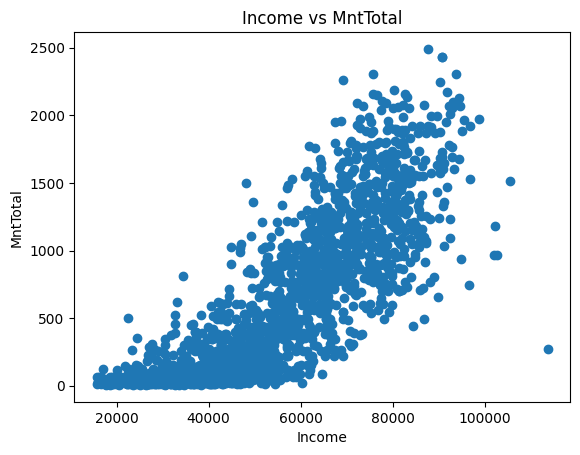

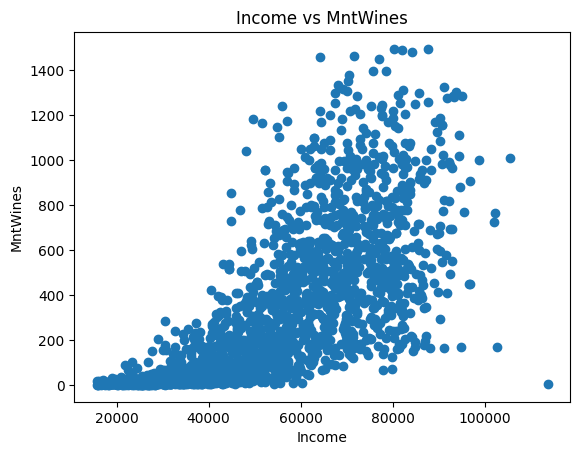

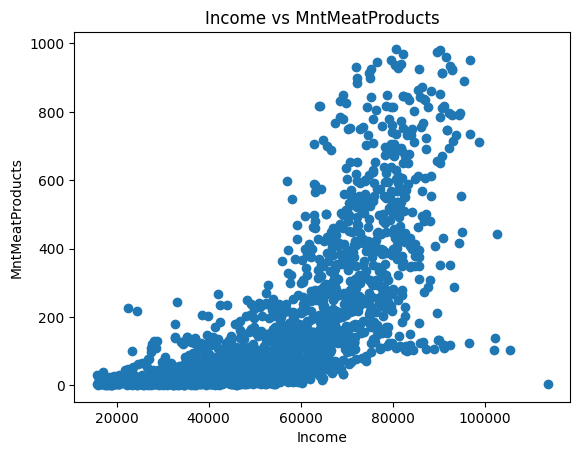

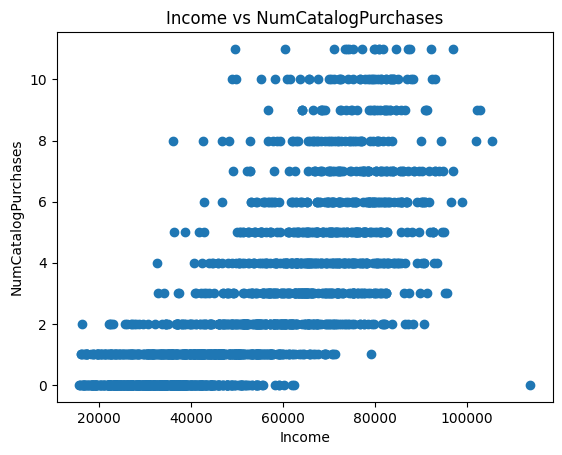

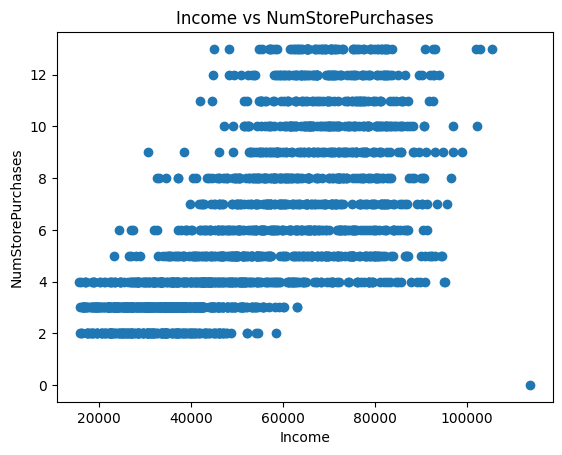

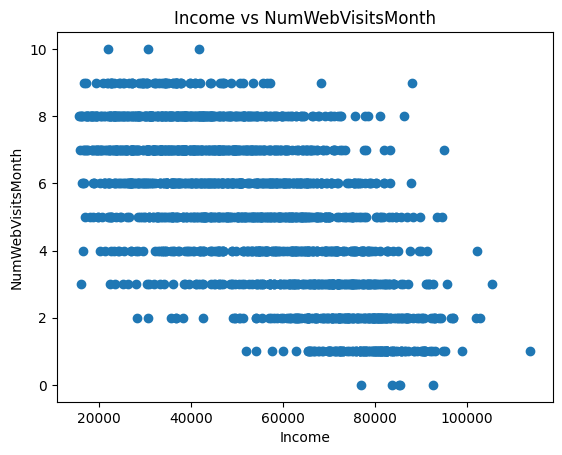

In [23]:
grafico_bivariado('Income','MntTotal')
grafico_bivariado('Income','MntWines')
grafico_bivariado('Income','MntMeatProducts')
grafico_bivariado('Income','NumCatalogPurchases')
grafico_bivariado('Income','NumStorePurchases')
grafico_bivariado('Income','NumWebVisitsMonth')

#### **Product analysis**

* Given the **positive correlation between wine and meat consumption**, it can be noted that **the catalog section may boost the sales of these items.** Since they are higher-value products, it is a **good strategy to increase revenue.**

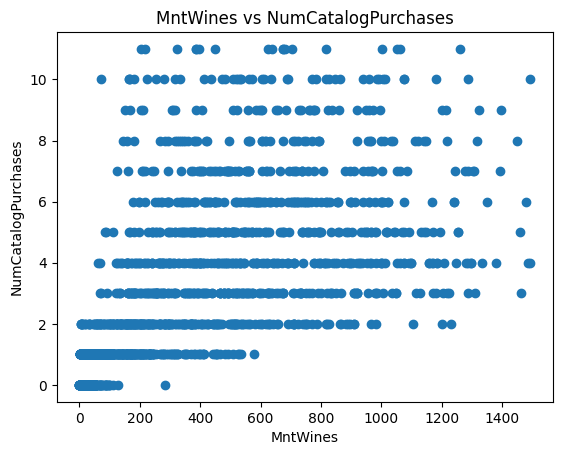

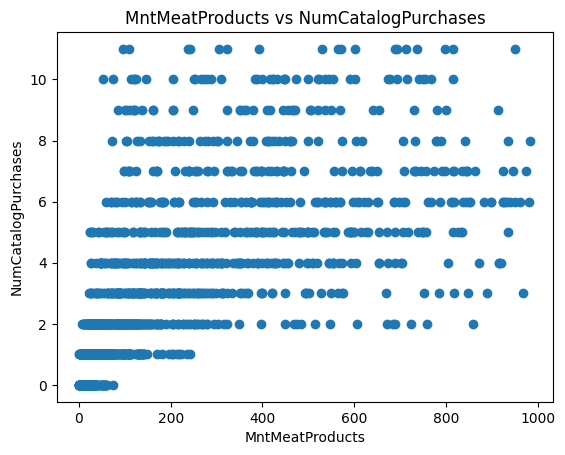

In [24]:
grafico_bivariado('MntWines', 'NumCatalogPurchases')
grafico_bivariado('MntMeatProducts','NumCatalogPurchases')

#### **Channel analysis**

* We observe higher average spending for purchases made via the company’s website, particularly between 10 and 11 purchases. This behavior is also present with catalog and in-store purchases, but the highest average spending occurs when there is recurring catalog shopping, especially after 6 purchases. This suggests that **if customers respond to catalog-focused campaigns**, **the promotion of this channel should be increased, as it will proportionally boost average spending.**

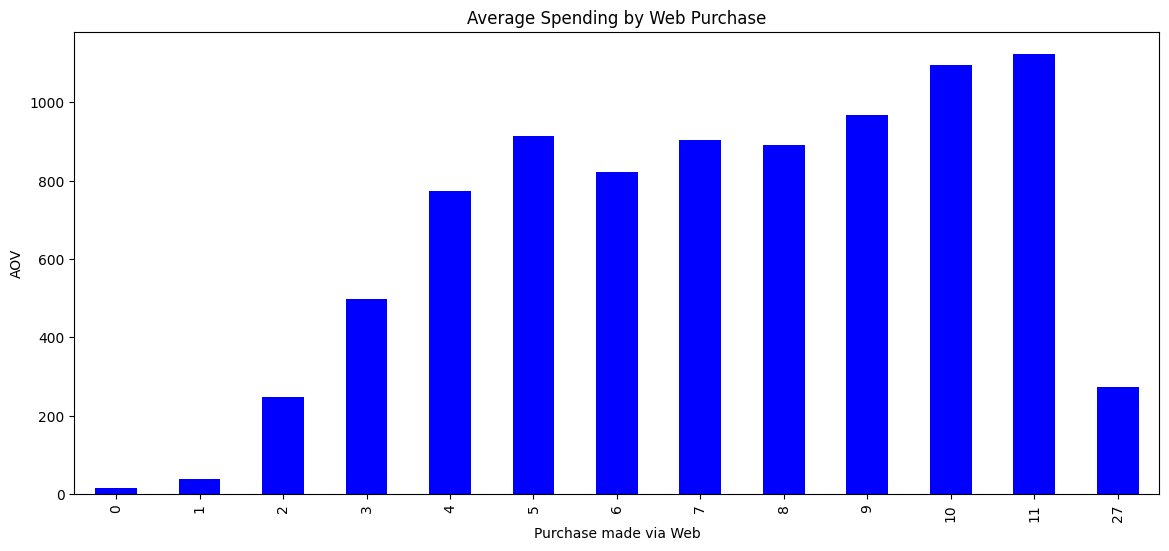

In [25]:
avg_spending_web = df['MntTotal'].groupby(df['NumWebPurchases']).mean()
avg_spending_catalog = df['MntTotal'].groupby(df['NumCatalogPurchases']).mean()
avg_spending_loja = df['MntTotal'].groupby(df['NumStorePurchases']).mean()

plt.figure(figsize=(14, 6))
avg_spending_web.plot(kind='bar', color='blue')
plt.title('Average Spending by Web Purchase')
plt.xlabel('Purchase made via Web')
plt.ylabel('AOV')
plt.show()

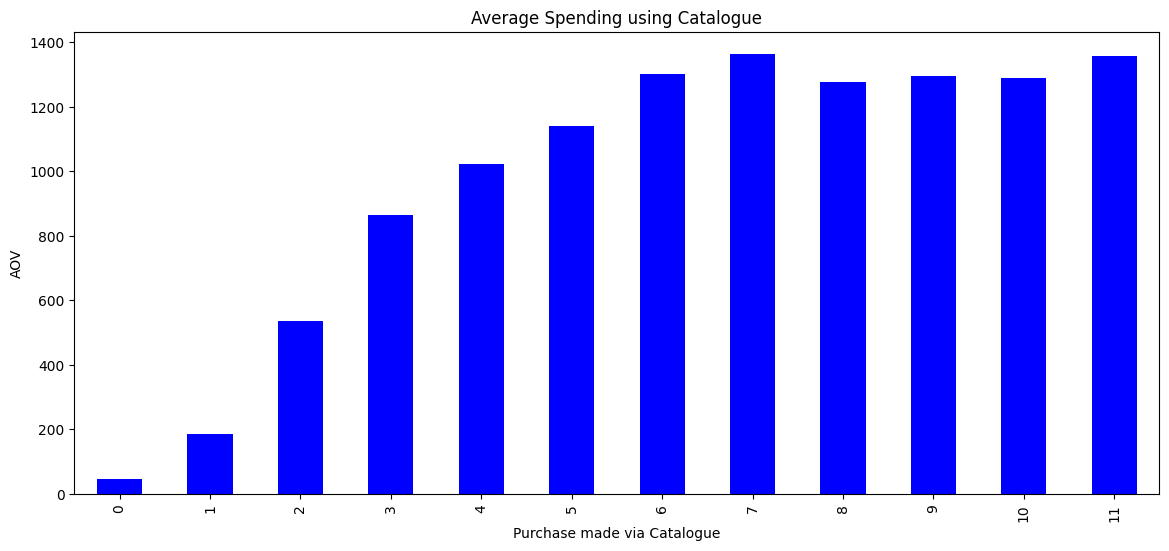

In [26]:
plt.figure(figsize=(14, 6))
avg_spending_catalog.plot(kind='bar', color='blue')
plt.title('Average Spending using Catalogue')
plt.xlabel('Purchase made via Catalogue')
plt.ylabel('AOV')
plt.show()

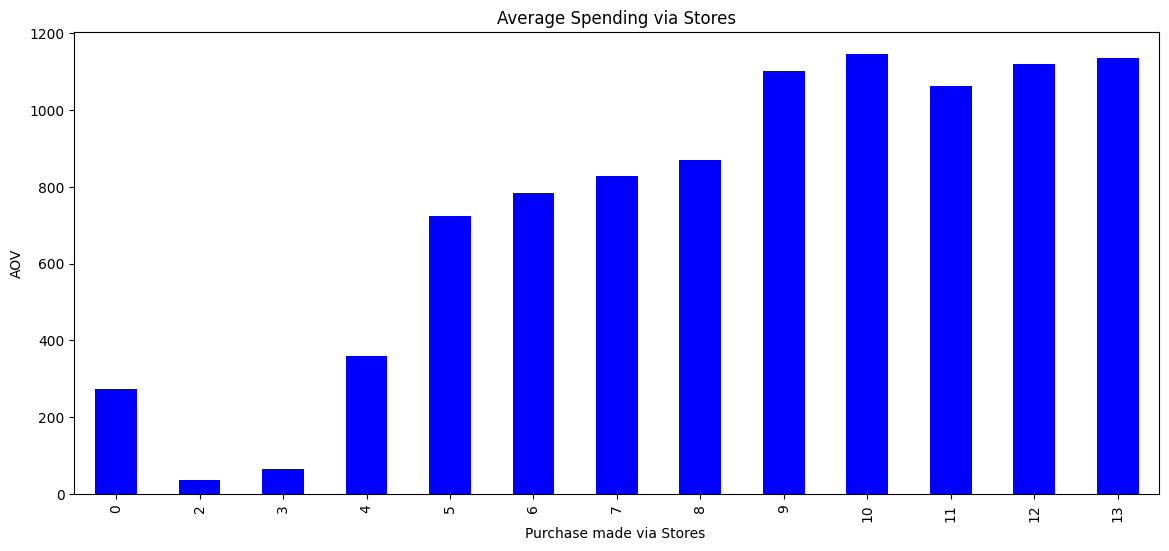

In [27]:
plt.figure(figsize=(14, 6))
avg_spending_loja.plot(kind='bar', color='blue')
plt.title('Average Spending via Stores')
plt.xlabel('Purchase made via Stores ')
plt.ylabel('AOV')
plt.show()

### **General Analysis**

* The channel with the highest absolute sales is in-store purchases, followed by the company’s website.
* The best-selling product is wine, followed by meat and gold.

In [28]:
df['TotalPurchases'] = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)
average_purchase_value = df['MntTotal'].sum() / df['TotalPurchases'].sum()
average_frequency_purchases = df['TotalPurchases'].mean()
average_recency = df['Recency'].mean()
avg_complains = df['Complain'].sum()/len(df['Complain'])*100
avg_Response =  df['Response'].sum()/len(df['Complain'])*100


print(f"Average Purchase Value: R${average_purchase_value:.2f}")
print(f"Average Frequency of Purchases: {average_frequency_purchases:.2f} purchases per customer")
print(f"Average Recency: {average_recency:.2f} days since the last purchase")
print("Percentage of Complains: {:.2f}% ".format(avg_complains))
print("Percentage of Response: {:.2f}% ".format(avg_Response))

Average Purchase Value: R$38.35
Average Frequency of Purchases: 15.09 purchases per customer
Average Recency: 48.85 days since the last purchase
Percentage of Complains: 0.97% 
Percentage of Response: 15.49% 


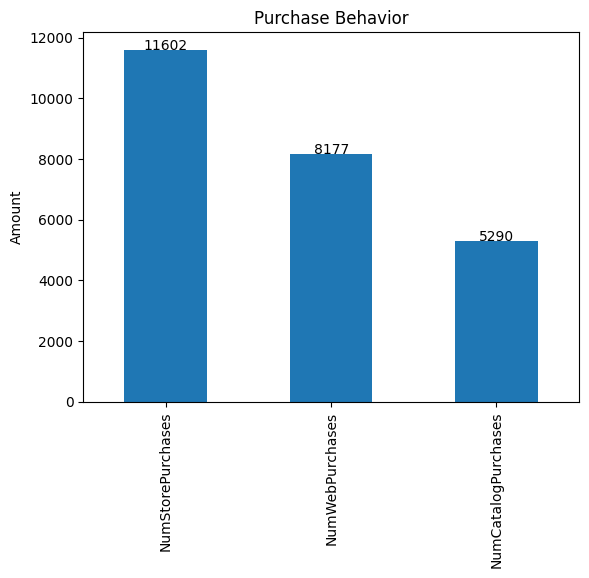

In [29]:
Top_Purchases = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum()
Top_Purchases = Top_Purchases.sort_values(ascending=False)
Top_Purchases.plot(kind='bar', label = 'Top Performers')
for index, value in enumerate(Top_Purchases):
    plt.text(index, value + 0.5, str(int(value)), ha='center')
plt.ylabel('Amount')
plt.title('Purchase Behavior')
plt.show()

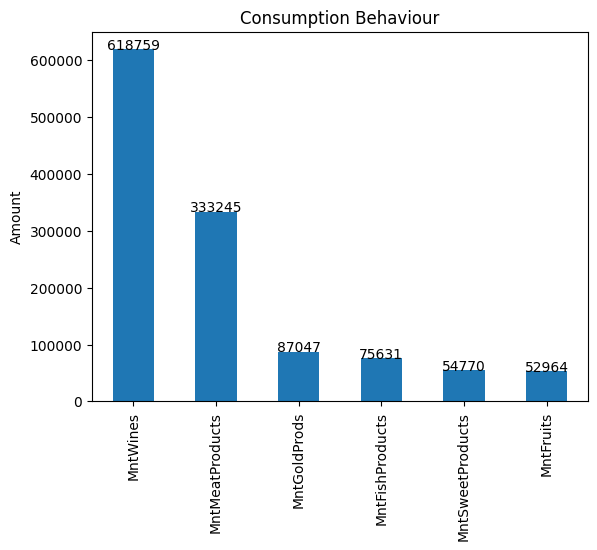

In [30]:
Top_Purchases = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()
Top_Purchases = Top_Purchases.sort_values(ascending=False)
Top_Purchases.plot(kind='bar', label = 'Top Performers')
for index, value in enumerate(Top_Purchases):
    plt.text(index, value + 0.5, str(int(value)), ha='center')
plt.ylabel('Amount')
plt.title('Consumption Behaviour')
plt.show()

### **Age Group analysis**

To assess the customer profile according to their demographic information, age groups will be created. Since the goal of the analysis is to understand the customer for marketing actions, age is an important factor, as each group interacts with different communication formats.

* *Age Group 20-29*: **They represent the smallest group of customers**, predominantly single individuals with **high income** and a graduate-level education. They **have the highest spending on food across all categories**. They are **on average the oldest customers** and **purchase more frequently**. They don't respond much to discounts and tend to buy more via stores or catalogs. They are more influenced during the 5th campaign, but generally responded well to the last one. They are the group with the highest number of complaints in the last two years. **Opportunity: Increase the customer base in this age group**.

* *Age Group 30-39*: This group has the **lowest income**, consisting **mainly of married or cohabiting individuals** with children, and they have advanced education. They are among those with the **lowest food expenditure**, especially on wine, but **consume more fish**. They tend to buy more from stores or the company’s website and **respond better after the 3rd campaign**.

* *Age Group 40-49*: They make up the **largest number of customers overall**, but they **spend the least on food**. They are also predominantly married or cohabiting, with advanced education. They consume little meat, fish, and fruit. They are **more recent customers who respond to discounts**, but **aren’t very sensitive to marketing campaigns**. **Opportunity: Since they represent the largest portion of the customer base, campaigns promoting coupons could be intensified to increase engagement**.

* *Age Group 50-59*: This group has the **highest divorce rate, adolescent children**, and advanced education. They are among those who **take the longest to make a new purchase**, but they are long-term customers. The store and company website are their most used channels. **They respond best to coupons**, have the **lowest complaint rate**, and tend to respond more after the 3rd campaign.

* *Age Group 60-69*: **They have a considerable average income**, many are married, but there is also a **high divorce rate**. They have advanced education with a strong presence of PhDs. **Their average consumption is high**, with the most significant spending in the wine and meat categories. They represent a **recent customer base with a slower purchase recurrence**. They did not engage much in the last campaign.

* *Age Group 70+*: **They have the second highest income**, with a **larger presence of widows and a high level of education**. They spend less on meat and fish but compensate with wine. **They buy frequently and are the most recent customers in the base**. They respond well to campaigns, either during the first attempt or the last ones.

In [31]:
bins = [20, 30,  40, 50, 60, 70, 80]
labels = ['20-29', '30-39','40-49', '50-59', '60-69', '70+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
df['AgeGroup'].value_counts()

,count
AgeGroup,
40-49,613
50-59,473
60-69,433
30-39,290
70+,118
20-29,34


In [32]:
demo = df.groupby('AgeGroup').agg(
    avg_income =('Income', 'mean'),
    avg_children =('Kidhome', 'mean'),
    avg_teen =('Teenhome', 'mean'),
    married =('marital_Married', lambda x: (x.sum() / len(x)) * 100),
    divorced =('marital_Divorced', lambda x: (x.sum() / len(x)) * 100),
    together =('marital_Together', lambda x: (x.sum() / len(x)) * 100),
    widow =('marital_Widow', lambda x: (x.sum() / len(x)) * 100),
    single =('marital_Single', lambda x: (x.sum() / len(x)) * 100),
    ed_basic =('education_Basic', lambda x: (x.sum() / len(x)) * 100),
    ed_EM =('education_2n Cycle', lambda x: (x.sum() / len(x)) * 100),
    ed_graduation =('education_Graduation', lambda x: (x.sum() / len(x)) * 100),
    ed_master =('education_Master', lambda x: (x.sum() / len(x)) * 100),
    ed_phd =('education_PhD', lambda x: (x.sum() / len(x)) * 100)
).reset_index()

demo.set_index('AgeGroup', inplace=True)

demo['avg_income'] = demo['avg_income'].map('R$ {:,.2f}'.format)
demo['avg_children'] = demo['avg_children'].map('{:.2f}'.format)
demo['avg_teen'] = demo['avg_teen'].map('{:.2f}'.format)
demo['married'] = demo['married'].map('{:.2f}%'.format)
demo['together'] = demo['together'].map('{:.2f}%'.format)
demo['divorced'] = demo['divorced'].map('{:.2f}%'.format)
demo['widow'] = demo['widow'].map('{:.2f}%'.format)
demo['single'] = demo['single'].map('{:.2f}%'.format)
demo['ed_basic'] = demo['ed_basic'].map('{:.2f}%'.format)
demo['ed_EM'] = demo['ed_EM'].map('{:.2f}%'.format)
demo['ed_graduation'] = demo['ed_graduation'].map('{:.2f}%'.format)
demo['ed_master'] = demo['ed_master'].map('{:.2f}%'.format)
demo['ed_phd'] = demo['ed_phd'].map('{:.2f}%'.format)
demo.T


AgeGroup,20-29,30-39,40-49,50-59,60-69,70+
avg_income,"R$ 65,397.47","R$ 45,924.76","R$ 49,612.43","R$ 54,299.64","R$ 57,629.62","R$ 61,083.89"
avg_children,0.09,0.61,0.59,0.39,0.25,0.18
avg_teen,0.00,0.03,0.48,0.70,0.75,0.47
married,14.71%,42.07%,44.54%,34.67%,36.26%,37.29%
divorced,0.00%,3.45%,9.95%,14.59%,12.70%,8.47%
together,23.53%,23.79%,24.80%,24.74%,27.02%,27.97%
widow,0.00%,0.00%,1.31%,3.81%,6.00%,15.25%
single,61.76%,30.69%,19.41%,22.20%,18.01%,11.02%
ed_basic,8.82%,3.79%,2.28%,0.85%,0.46%,0.85%
ed_EM,14.71%,13.45%,10.77%,5.07%,8.08%,2.54%


In [33]:
# Grouping and calculating averages per category
consumption = df.groupby('AgeGroup').agg(
    avg_wines=('MntWines', 'mean'),
    avg_fruits=('MntFruits', 'mean'),
    avg_meat=('MntMeatProducts', 'mean'),
    avg_fish=('MntFishProducts', 'mean'),
    avg_sweet=('MntSweetProducts', 'mean'),
    avg_gold=('MntGoldProds', 'mean'),
    avg_food_total=('MntRegularProds', 'mean'),
    avg_total=('MntTotal', 'mean')
).reset_index()

consumption.set_index('AgeGroup', inplace=True)


consumption['pct_wines'] = consumption['avg_wines'] / consumption['avg_total'] * 100
consumption['pct_fruits'] = consumption['avg_fruits'] / consumption['avg_total'] * 100
consumption['pct_meat'] = consumption['avg_meat'] / consumption['avg_total'] * 100
consumption['pct_fish'] = consumption['avg_fish'] / consumption['avg_total'] * 100
consumption['pct_sweet'] = consumption['avg_sweet'] / consumption['avg_total'] * 100
consumption['pct_gold'] = consumption['avg_gold'] / consumption['avg_total'] * 100
consumption['pct_food_total'] = consumption['avg_food_total'] / consumption['avg_total'] * 100

consumption['avg_wines'] = consumption['avg_wines'].map('R$ {:,.2f}'.format)
consumption['avg_fruits'] = consumption['avg_fruits'].map('R$ {:,.2f}'.format)
consumption['avg_meat'] = consumption['avg_meat'].map('R$ {:,.2f}'.format)
consumption['avg_fish'] = consumption['avg_fish'].map('R$ {:,.2f}'.format)
consumption['avg_sweet'] = consumption['avg_sweet'].map('R$ {:,.2f}'.format)
consumption['avg_gold'] = consumption['avg_gold'].map('R$ {:,.2f}'.format)
consumption['avg_food_total'] = consumption['avg_food_total'].map('R$ {:,.2f}'.format)
consumption['avg_total'] = consumption['avg_total'].map('R$ {:,.2f}'.format)

consumption['pct_wines'] = consumption['pct_wines'].map('{:.2f}%'.format)
consumption['pct_fruits'] = consumption['pct_fruits'].map('{:.2f}%'.format)
consumption['pct_meat'] = consumption['pct_meat'].map('{:.2f}%'.format)
consumption['pct_fish'] = consumption['pct_fish'].map('{:.2f}%'.format)
consumption['pct_sweet'] = consumption['pct_sweet'].map('{:.2f}%'.format)
consumption['pct_gold'] = consumption['pct_gold'].map('{:.2f}%'.format)
consumption['pct_food_total'] = consumption['pct_food_total'].map('{:.2f}%'.format)

# Transpose the DataFrame to view as you need
consumption.T


AgeGroup,20-29,30-39,40-49,50-59,60-69,70+
avg_wines,R$ 454.85,R$ 241.95,R$ 256.71,R$ 347.36,R$ 362.24,R$ 461.64
avg_fruits,R$ 44.09,R$ 27.48,R$ 23.08,R$ 28.00,R$ 28.57,R$ 31.64
avg_meat,R$ 379.18,R$ 164.97,R$ 139.71,R$ 168.19,R$ 184.16,R$ 233.64
avg_fish,R$ 72.26,R$ 37.46,R$ 33.50,R$ 37.09,R$ 42.82,R$ 48.21
avg_sweet,R$ 46.97,R$ 26.67,R$ 25.95,R$ 26.79,R$ 29.87,R$ 33.26
avg_gold,R$ 76.76,R$ 39.81,R$ 39.28,R$ 46.43,R$ 50.00,R$ 44.04
avg_food_total,R$ 920.59,R$ 458.72,R$ 439.66,R$ 561.01,R$ 597.66,R$ 764.35
avg_total,R$ 997.35,R$ 498.53,R$ 478.94,R$ 607.44,R$ 647.66,R$ 808.39
pct_wines,45.61%,48.53%,53.60%,57.18%,55.93%,57.11%
pct_fruits,4.42%,5.51%,4.82%,4.61%,4.41%,3.91%


In [34]:
contact = df.groupby('AgeGroup').agg(
    avg_Recency =('Recency', 'mean'),
    avg_C_days =('Customer_Days', 'mean'),
    avg_deals =('NumDealsPurchases', 'mean'),
    avg_catalog =('NumCatalogPurchases', 'mean'),
    avg_store =('NumStorePurchases', 'mean'),
    avg_web_purchase=('NumWebPurchases', 'mean'),
    avg_web_visits =('NumWebVisitsMonth', 'mean'),
    Acc_1 =('AcceptedCmp1', lambda x: (x.sum() / len(x)) * 100),
    Acc_2 =('AcceptedCmp2', lambda x: (x.sum() / len(x)) * 100),
    Acc_3 =('AcceptedCmp3', lambda x: (x.sum() / len(x)) * 100),
    Acc_4 =('AcceptedCmp4', lambda x: (x.sum() / len(x)) * 100),
    Acc_5 =('AcceptedCmp5', lambda x: (x.sum() / len(x)) * 100),
    Response = ('Response', lambda x: (x.sum() / len(x)) * 100),
    Complain = ('Complain', lambda x: (x.sum() / len(x)) * 100)).reset_index()

contact.set_index('AgeGroup', inplace=True)

contact['avg_Recency'] = contact['avg_Recency'].map('{:.2f}'.format)
contact['avg_C_days'] = contact['avg_C_days'].map('{:.2f}'.format)
contact['avg_deals'] = contact['avg_deals'].map('{:,.2f}'.format)
contact['avg_catalog'] = contact['avg_catalog'].map('{:,.2f}'.format)
contact['avg_store'] = contact['avg_store'].map('{:,.2f}'.format)
contact['avg_web_purchase'] = contact['avg_web_purchase'].map('{:,.2f}'.format)
contact['avg_web_visits'] = contact['avg_web_visits'].map('{:,.2f}'.format)
contact['Acc_1'] = contact['Acc_1'].map('{:.2f}%'.format)
contact['Acc_2'] = contact['Acc_2'].map('{:.2f}%'.format)
contact['Acc_3'] = contact['Acc_3'].map('{:.2f}%'.format)
contact['Acc_4'] = contact['Acc_4'].map('{:.2f}%'.format)
contact['Acc_5'] = contact['Acc_5'].map('{:.2f}%'.format)
contact['Response'] = contact['Response'].map('{:.2f}%'.format)
contact['Complain'] = contact['Complain'].map('{:.2f}%'.format)
contact.T

AgeGroup,20-29,30-39,40-49,50-59,60-69,70+
avg_Recency,44.50,48.27,48.55,49.47,50.31,44.82
avg_C_days,2528.79,2504.17,2507.71,2515.74,2513.07,2494.38
avg_deals,1.09,1.77,2.45,2.52,2.45,1.91
avg_catalog,4.88,2.12,2.23,2.74,3.26,3.70
avg_store,6.91,5.22,5.52,6.10,6.41,6.81
avg_web_purchase,4.03,3.44,3.94,4.38,4.55,4.91
avg_web_visits,3.68,5.54,5.65,5.32,4.80,4.34
Acc_1,14.71%,9.31%,5.06%,5.92%,6.70%,11.02%
Acc_2,2.94%,1.38%,0.82%,1.90%,1.62%,0.00%
Acc_3,8.82%,12.41%,7.50%,6.13%,5.54%,5.93%


### **Campaing Acceptance Analysis**

The comparative analyses below highlight several key points. **Customers who engage with the campaign tend to spend significantly** more on the platform. Additionally, they make purchases **more frequently and are more loyal customers**.

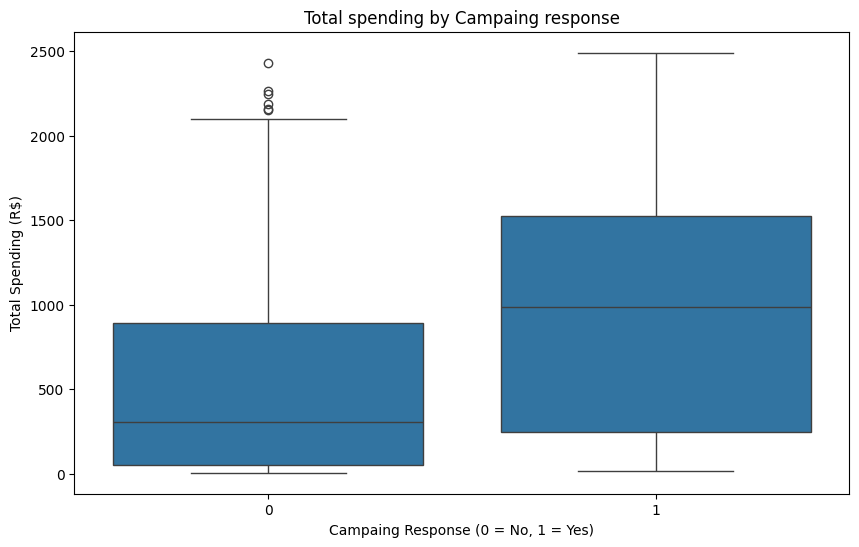

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Response', y='MntTotal', data=df)
plt.title('Total spending by Campaing response')
plt.xlabel('Campaing Response (0 = No, 1 = Yes)')
plt.ylabel('Total Spending (R$)')
plt.show()

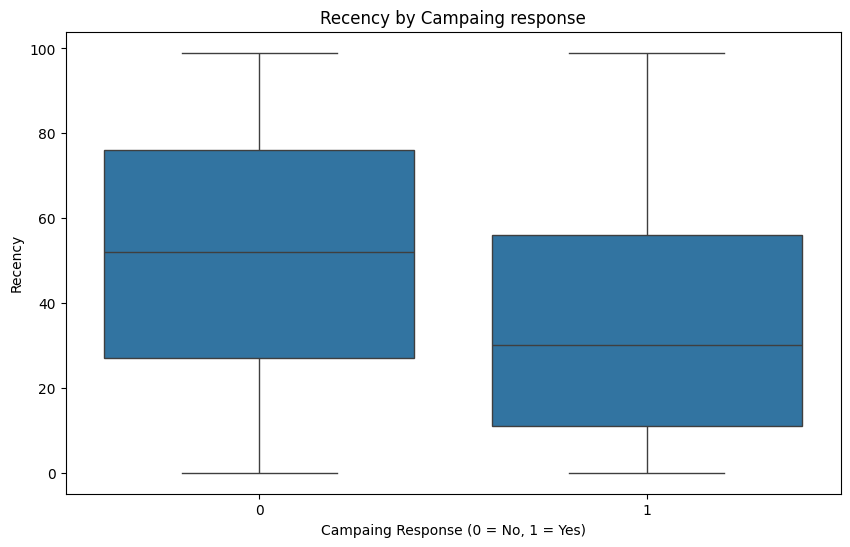

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Response', y='Recency', data=df)
plt.title('Recency by Campaing response')
plt.xlabel('Campaing Response (0 = No, 1 = Yes)')
plt.ylabel('Recency')
plt.show()

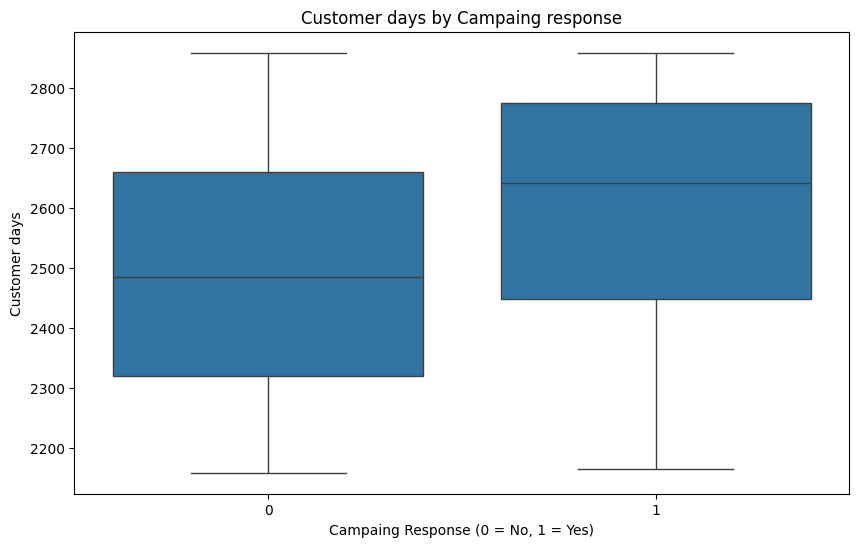

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Response', y='Customer_Days', data=df)
plt.title('Customer days by Campaing response')
plt.xlabel('Campaing Response (0 = No, 1 = Yes)')
plt.ylabel('Customer days')
plt.show()

Boxplot para comparar a recência de compras entre quem aceitou e não aceitou a campanha

# Results

* What is the demographic profile of the customers (income, household composition, education, and marital status)?

This question was answered on the Age Group Analysis
* What are the purchasing habits of the customers (e.g., spending on wines, fruits, meat, fish, and other products)?

This question was answered on the Product Analysis and on the Age Group Analysis
* How do customer interactions vary across different channels?

This question was answered on the General Analysis
* What is the impact of past marketing campaigns on customer purchases (campaign acceptance vs. spending)

This question was answered on the Campaing Acceptance Analysis